# IOR Benchmark Results

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from pprint import pprint

## Configuration

In [44]:
# Color palette
CB_color_cycle = {
    "blue":'#377eb8',
    "orange":'#ff7f00',
    "green":'#4daf4a',
    "pink":'#f781bf',
    "brown":'#a65628',
    "purple":'#984ea3',
    "gray":'#999999',
    "red":'#e41a1c',
    "yellow":'#dede00'
}


experiment_dir = "ior/grenoble"
experiment_flash = "results_flash.csv"
experiment_disk = "results_disk.csv"

df_flash = pd.read_csv(f"{experiment_dir}/{experiment_flash}", header=0)
df_disk = pd.read_csv(f"{experiment_dir}/{experiment_disk}", header=0)

df_flash

,access_type,threads,transfer_size,access,bw(MiB/s),IOPS,Latency,block(KiB),xfer(KiB),open(s),wr/rd(s),close(s),total(s),numTasks,iter
0,seq_write,32,16m,write,27135.9688,1696.0195,0.0363,16777216.0,16384.0,0.0086,38.6411,24.2267,38.6416,64,0
1,seq_read,32,16m,read,28805.2367,1800.3649,0.0355,16777216.0,16384.0,0.0016,36.4015,24.7580,36.4023,64,0
2,rand_write,32,16m,write,37879.2400,2367.4950,0.0257,16777216.0,16384.0,0.0114,27.6816,2.0832,27.6821,64,0
3,rand_read,32,16m,read,39275.2087,2454.7904,0.0257,16777216.0,16384.0,0.0017,26.6972,3.4322,26.6982,64,0
4,seq_write,32,64m,write,41838.6043,653.7421,0.0746,16777216.0,65536.0,0.0090,25.0619,6.8782,25.0624,64,0
5,seq_read,32,64m,read,43203.6925,675.0791,0.0912,16777216.0,65536.0,0.0015,24.2697,7.1871,24.2705,64,0
6,rand_write,32,64m,write,40580.2781,634.0792,0.0908,16777216.0,65536.0,0.1828,25.8390,8.8996,25.8395,64,0
7,rand_read,32,64m,read,43326.2159,676.9922,0.0713,16777216.0,65536.0,0.0024,24.2012,7.6495,24.2019,64,0
8,seq_write,64,16m,write,39726.7076,2482.9416,0.0494,16777216.0,16384.0,0.0189,52.7890,15.6493,52.7895,128,0
9,seq_read,64,16m,read,41217.8263,2576.3475,0.0493,16777216.0,16384.0,0.0120,50.8751,17.7242,50.8797,128,0


## Single-Node Write Performance

### Parameters

* _Concurrent Tasks_: **1, 16, 32, 64, 128**
* _Nodes_: **1**
* _Transfer Sizes_: **128 KiB, 1 MiB, 16 MiB, 64 MiB**
* _Block Size_: **16 GiB**
* _Aggregate Filesize_: **2 TiB**
* _Access_: **File-per-process**

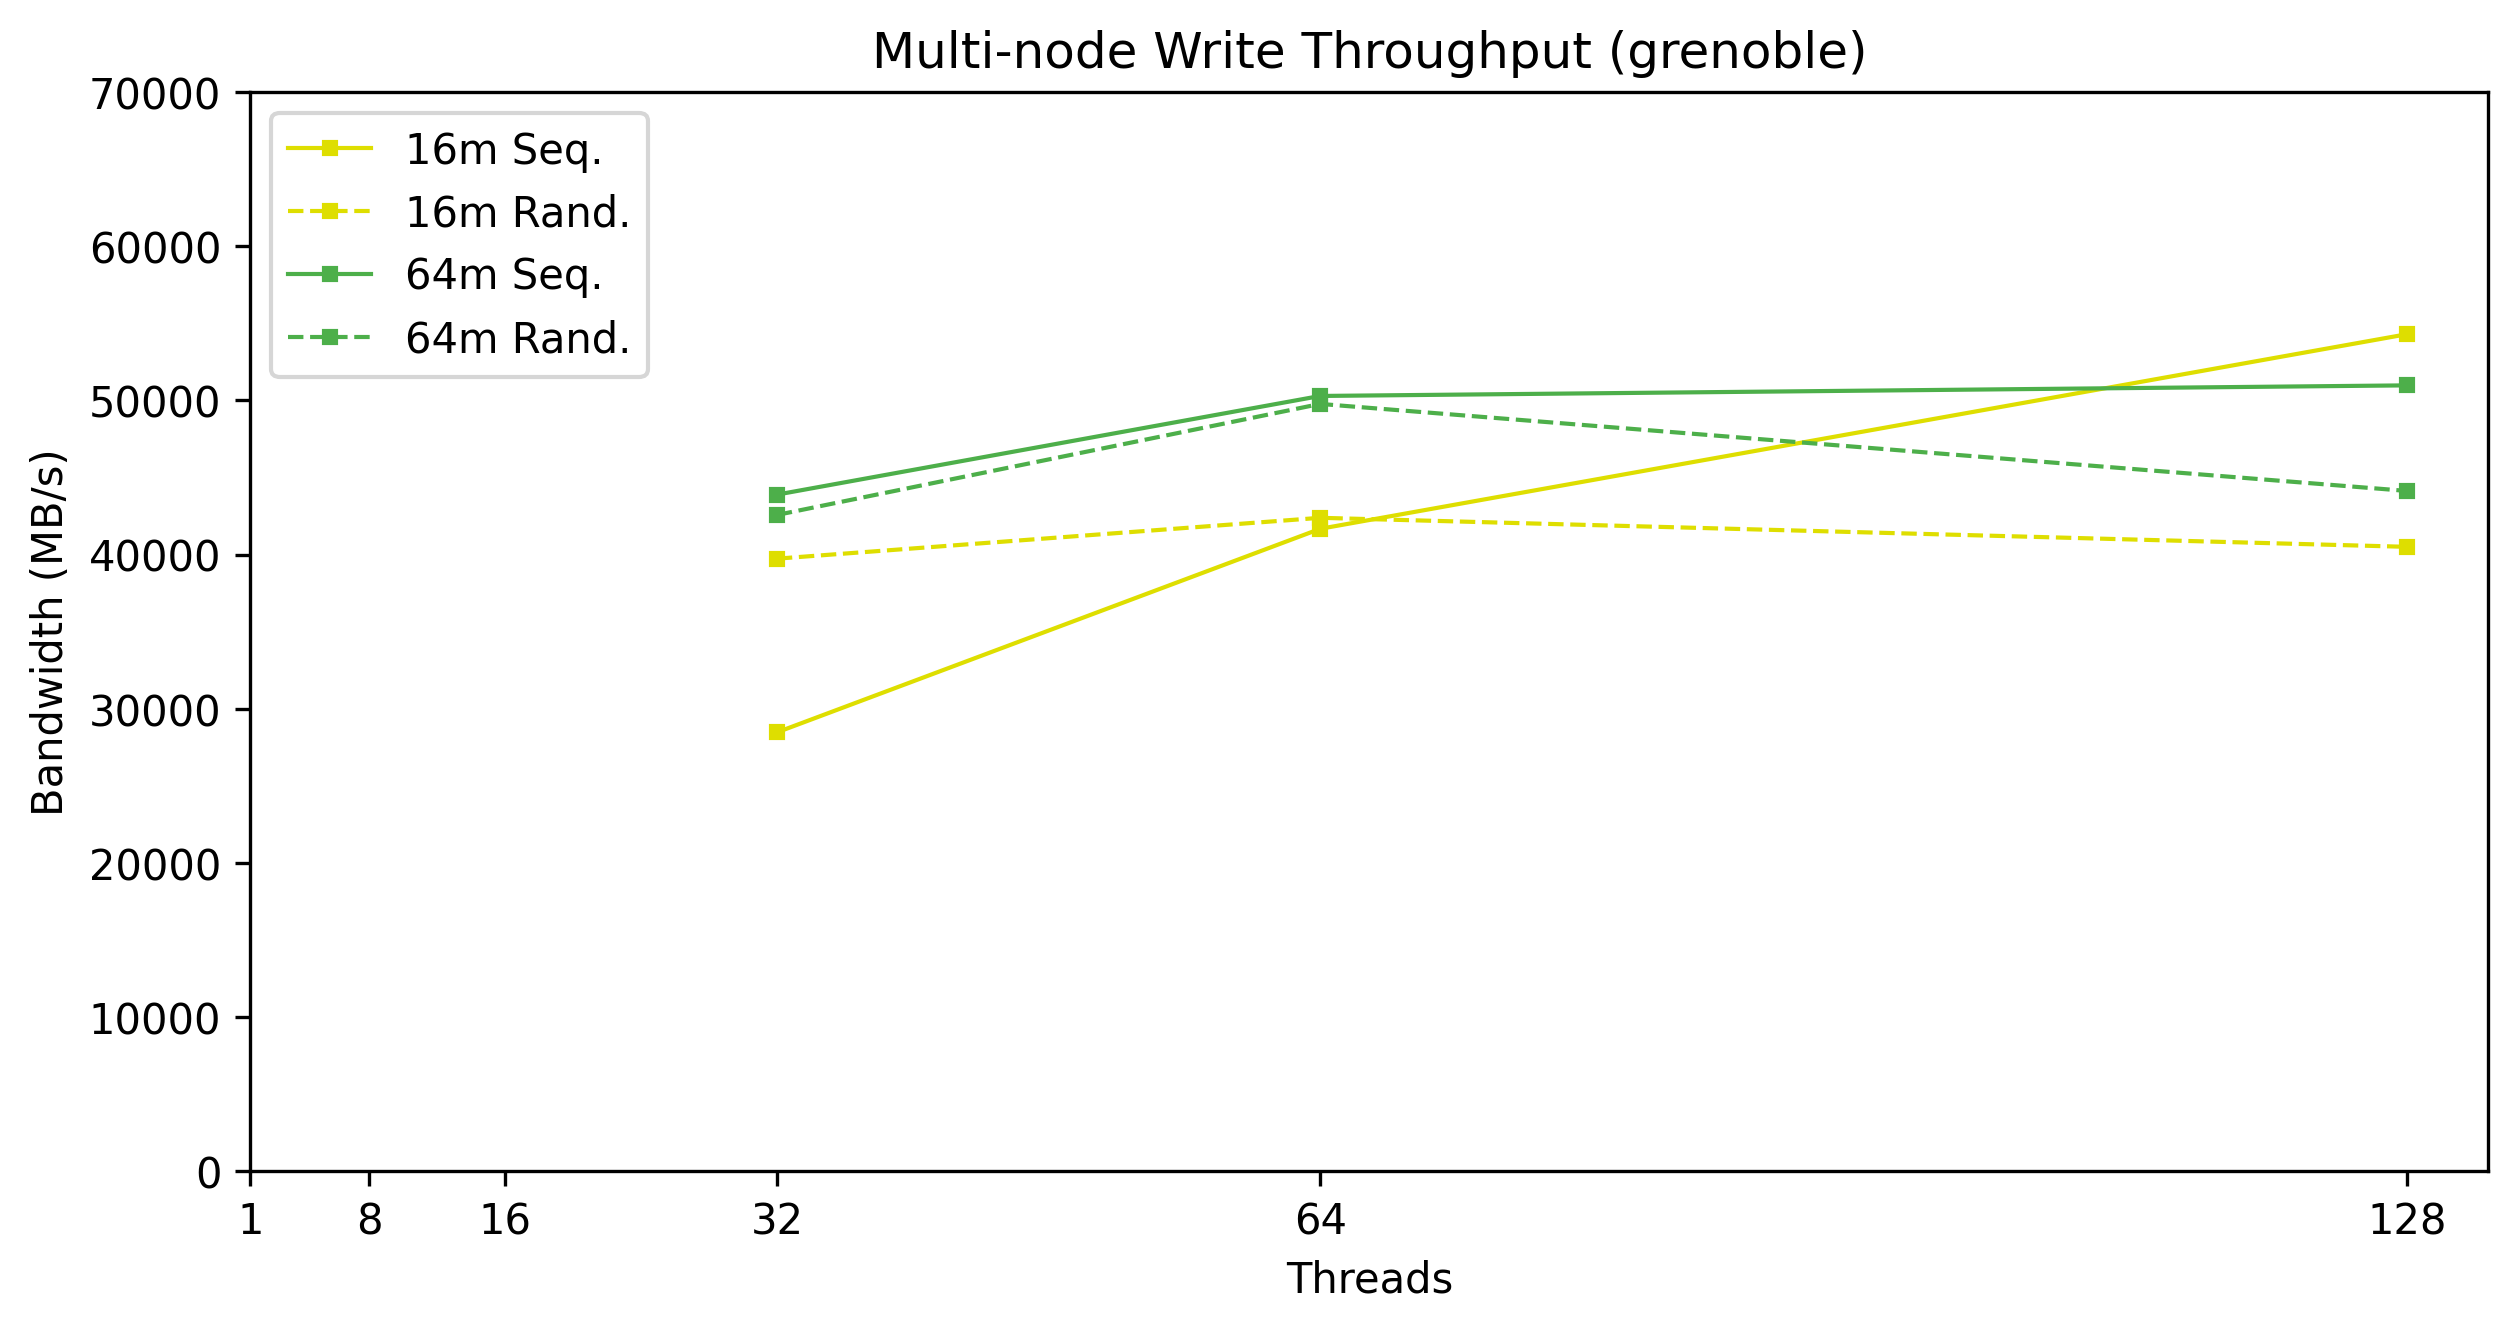

In [45]:
number_rows = 1
number_cols = 1

fig, ax = plt.subplots(nrows=number_rows, ncols=number_cols, figsize=(9,5), dpi=300)
fig.tight_layout(pad=4)

df_flash["bw(MB/s)"] = df_flash["bw(MiB/s)"] * 1.049
df_flash["bw(GB/s)"] = df_flash["bw(MB/s)"] / 1000.0

df_disk["bw(MB/s)"] = df_disk["bw(MiB/s)"] * 1.049
df_disk["bw(GB/s)"] = df_disk["bw(MB/s)"] / 1000.0

# Separate out
seq_reads_df_flash = df_flash.loc[df_flash["access_type"] == "seq_read"]
seq_writes_df_flash = df_flash.loc[df_flash["access_type"] == "seq_write"]
rand_reads_df_flash = df_flash.loc[df_flash["access_type"] == "rand_read"]
rand_writes_df_flash = df_flash.loc[df_flash["access_type"] == "rand_write"]

seq_reads_df_disk = df_disk.loc[df_disk["access_type"] == "seq_read"]
seq_writes_df_disk = df_disk.loc[df_disk["access_type"] == "seq_write"]
rand_reads_df_disk = df_disk.loc[df_disk["access_type"] == "rand_read"]
rand_writes_df_disk = df_disk.loc[df_disk["access_type"] == "rand_write"]

# Plot 128k transfer size, seq writes
ax.plot(
    seq_writes_df_flash.loc[seq_writes_df_flash["transfer_size"] == "128k"]["threads"],
    seq_writes_df_flash.loc[seq_writes_df_flash["transfer_size"] == "128k"]["bw(MB/s)"],
    lw=1, label="128k Seq.",
    marker="s", markersize=3,
    color=CB_color_cycle["blue"]
)
# ax[1].plot(
#     seq_writes_df_disk.loc[seq_writes_df_disk["transfer_size"] == "128k"]["threads"],
#     seq_writes_df_disk.loc[seq_writes_df_disk["transfer_size"] == "128k"]["bw(MB/s)"],
#     lw=1, label="128k Seq.",
#     marker="s", markersize=3,
#     color=CB_color_cycle["blue"]
# )

#Plot 128k transfer size, rand writes
ax.plot(
    rand_writes_df_flash.loc[rand_writes_df_flash["transfer_size"] == "128k"]["threads"],
    rand_writes_df_flash.loc[rand_writes_df_flash["transfer_size"] == "128k"]["bw(MB/s)"],
    lw=1, label="128k Rand.",
    marker="s", markersize=3, linestyle="dashed",
    color=CB_color_cycle["blue"]
)
# ax[1].plot(
#     rand_writes_df_disk.loc[rand_writes_df_disk["transfer_size"] == "128k"]["threads"],
#     rand_writes_df_disk.loc[rand_writes_df_disk["transfer_size"] == "128k"]["bw(MB/s)"],
#     lw=1, label="128k Rand.",
#     marker="s", markersize=3, linestyle="dashed",
#     color=CB_color_cycle["blue"]
# )

# Plot 1m transfer size, seq writes
ax.plot(
    seq_writes_df_flash.loc[seq_writes_df_flash["transfer_size"] == "1m"]["threads"],
    seq_writes_df_flash.loc[seq_writes_df_flash["transfer_size"] == "1m"]["bw(MB/s)"],
    lw=1, label="1m Seq.",
    marker="s", markersize=3,
    color=CB_color_cycle["red"]
)
# ax[1].plot(
#     seq_writes_df_disk.loc[seq_writes_df_disk["transfer_size"] == "1m"]["threads"],
#     seq_writes_df_disk.loc[seq_writes_df_disk["transfer_size"] == "1m"]["bw(MB/s)"],
#     lw=1, label="1m Seq.",
#     marker="s", markersize=3,
#     color=CB_color_cycle["red"]
# )

#Plot 1m transfer size, rand writes
ax.plot(
    rand_writes_df_flash.loc[rand_writes_df_flash["transfer_size"] == "1m"]["threads"],
    rand_writes_df_flash.loc[rand_writes_df_flash["transfer_size"] == "1m"]["bw(MB/s)"],
    lw=1, label="1m Rand.",
    marker="s", markersize=3, linestyle="dashed",
    color=CB_color_cycle["red"]
)
# ax[1].plot(
#     rand_writes_df_disk.loc[rand_writes_df_disk["transfer_size"] == "1m"]["threads"],
#     rand_writes_df_disk.loc[rand_writes_df_disk["transfer_size"] == "1m"]["bw(MB/s)"],
#     lw=1, label="1m Rand.",
#     marker="s", markersize=3, linestyle="dashed",
#     color=CB_color_cycle["red"]
# )

# Plot 16m transfer size, seq writes
ax.plot(
    seq_writes_df_flash.loc[seq_writes_df_flash["transfer_size"] == "16m"]["threads"],
    seq_writes_df_flash.loc[seq_writes_df_flash["transfer_size"] == "16m"]["bw(MB/s)"],
    lw=1, label="16m Seq.",
    marker="s", markersize=3,
    color=CB_color_cycle["yellow"]
)
# ax[1].plot(
#     seq_writes_df_disk.loc[seq_writes_df_disk["transfer_size"] == "16m"]["threads"],
#     seq_writes_df_disk.loc[seq_writes_df_disk["transfer_size"] == "16m"]["bw(MB/s)"],
#     lw=1, label="16m Seq.",
#     marker="s", markersize=3,
#     color=CB_color_cycle["yellow"]
# )

#Plot 16m transfer size, rand writes
ax.plot(
    rand_writes_df_flash.loc[rand_writes_df_flash["transfer_size"] == "16m"]["threads"],
    rand_writes_df_flash.loc[rand_writes_df_flash["transfer_size"] == "16m"]["bw(MB/s)"],
    lw=1, label="16m Rand.",
    marker="s", markersize=3, linestyle="dashed",
    color=CB_color_cycle["yellow"]
)
# ax[1].plot(
#     rand_writes_df_disk.loc[rand_writes_df_disk["transfer_size"] == "16m"]["threads"],
#     rand_writes_df_disk.loc[rand_writes_df_disk["transfer_size"] == "16m"]["bw(MB/s)"],
#     lw=1, label="16m Rand.",
#     marker="s", markersize=3, linestyle="dashed",
#     color=CB_color_cycle["yellow"]
# )

# Plot 64m transfer size, seq writes
ax.plot(
    seq_writes_df_flash.loc[seq_writes_df_flash["transfer_size"] == "64m"]["threads"],
    seq_writes_df_flash.loc[seq_writes_df_flash["transfer_size"] == "64m"]["bw(MB/s)"],
    lw=1, label="64m Seq.",
    marker="s", markersize=3,
    color=CB_color_cycle["green"]
)
# ax[1].plot(
#     seq_writes_df_disk.loc[seq_writes_df_disk["transfer_size"] == "64m"]["threads"],
#     seq_writes_df_disk.loc[seq_writes_df_disk["transfer_size"] == "64m"]["bw(MB/s)"],
#     lw=1, label="64m Seq.",
#     marker="s", markersize=3,
#     color=CB_color_cycle["green"]
# )

#Plot 64m transfer size, rand writes
ax.plot(
    rand_writes_df_flash.loc[rand_writes_df_flash["transfer_size"] == "64m"]["threads"],
    rand_writes_df_flash.loc[rand_writes_df_flash["transfer_size"] == "64m"]["bw(MB/s)"],
    lw=1, label="64m Rand.",
    marker="s", markersize=3, linestyle="dashed",
    color=CB_color_cycle["green"]
)
# ax[1].plot(
#     rand_writes_df_disk.loc[rand_writes_df_disk["transfer_size"] == "64m"]["threads"],
#     rand_writes_df_disk.loc[rand_writes_df_disk["transfer_size"] == "64m"]["bw(MB/s)"],
#     lw=1, label="64m Rand.",
#     marker="s", markersize=3, linestyle="dashed",
#     color=CB_color_cycle["green"]
# )

# Flash subplot settings
ax.set_ylim(0, 50000)
ax.set_title("Single-node Write Throughput")
ax.set_ylabel("Bandwidth (MB/s)")
ax.set_xlabel("Threads")
ax.set_xticks([1, 8, 16, 32, 64, 128])
ax.legend()

# Disk subplot settings
# ax[1].set_ylim(0, 60000)
# ax[1].set_title("Single-node Disk Write Throughput")
# ax[1].set_ylabel("Bandwidth (MB/s)")
# ax[1].set_xlabel("Threads")
# ax[1].set_xticks([1, 16, 32, 64, 128])
# ax[1].legend()

#plt.show()
plt.savefig("grenoble_ior_write_perf.png", dpi=300)
#seq_writes_df


## Single-Node Read Performance

### Parameters

* _Concurrent Tasks_: **1, 16, 32, 64, 128**
* _Nodes_: **1**
* _Transfer Sizes_: **128 KiB, 1 MiB, 16 MiB, 64 MiB**
* _Block Size_: **16 GiB**
* _Aggregate Filesize_: **2 TiB**
* _Access_: **File-per-process**

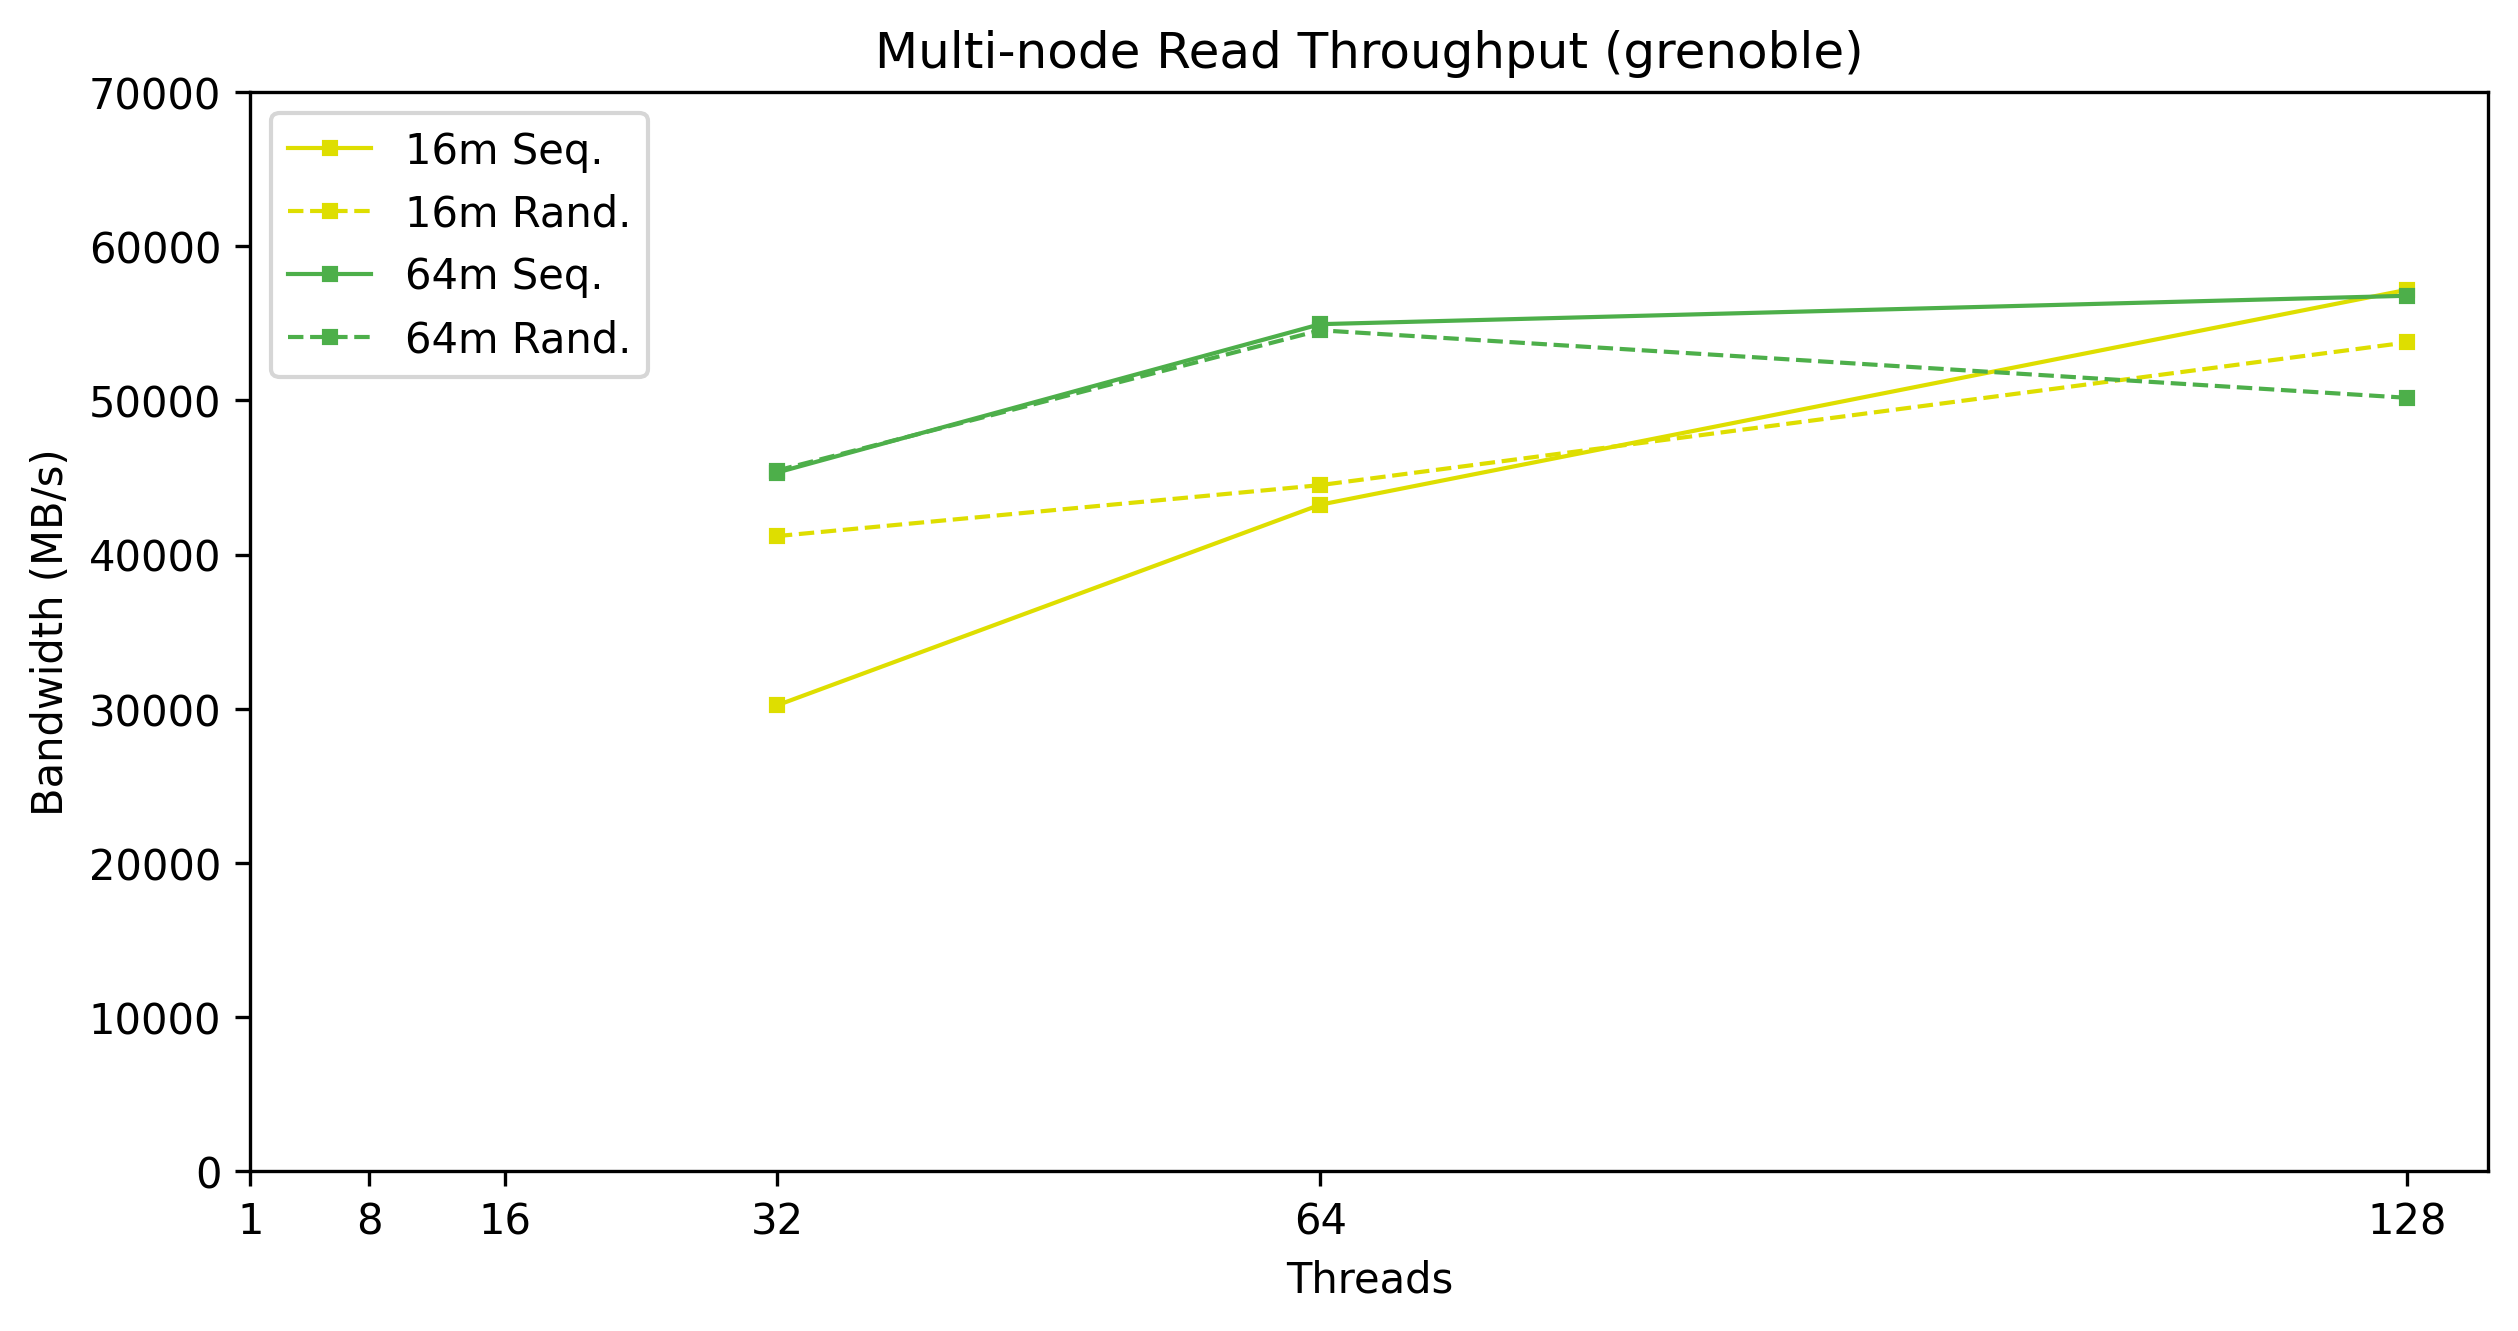

In [46]:
number_rows = 1
number_cols = 1

fig, ax = plt.subplots(nrows=number_rows, ncols=number_cols, figsize=(9,5), dpi=300)
fig.tight_layout(pad=4)

# Plot 128k transfer size, seq writes
ax.plot(
    seq_reads_df_flash.loc[seq_reads_df_flash["transfer_size"] == "128k"]["threads"],
    seq_reads_df_flash.loc[seq_reads_df_flash["transfer_size"] == "128k"]["bw(MB/s)"],
    lw=1, label="128k Seq.",
    marker="s", markersize=3,
    color=CB_color_cycle["blue"]
)

#Plot 128k transfer size, rand writes
ax.plot(
    rand_reads_df_flash.loc[rand_reads_df_flash["transfer_size"] == "128k"]["threads"],
    rand_reads_df_flash.loc[rand_reads_df_flash["transfer_size"] == "128k"]["bw(MB/s)"],
    lw=1, label="128k Rand.",
    marker="s", markersize=3, linestyle="dashed",
    color=CB_color_cycle["blue"]
)

# Plot 1m transfer size, seq writes
ax.plot(
    seq_reads_df_flash.loc[seq_reads_df_flash["transfer_size"] == "1m"]["threads"],
    seq_reads_df_flash.loc[seq_reads_df_flash["transfer_size"] == "1m"]["bw(MB/s)"],
    lw=1, label="1m Seq.",
    marker="s", markersize=3,
    color=CB_color_cycle["red"]
)

#Plot 1m transfer size, rand writes
ax.plot(
    rand_reads_df_flash.loc[rand_reads_df_flash["transfer_size"] == "1m"]["threads"],
    rand_reads_df_flash.loc[rand_reads_df_flash["transfer_size"] == "1m"]["bw(MB/s)"],
    lw=1, label="1m Rand.",
    marker="s", markersize=3, linestyle="dashed",
    color=CB_color_cycle["red"]
)

# Plot 16m transfer size, seq writes
ax.plot(
    seq_reads_df_flash.loc[seq_reads_df_flash["transfer_size"] == "16m"]["threads"],
    seq_reads_df_flash.loc[seq_reads_df_flash["transfer_size"] == "16m"]["bw(MB/s)"],
    lw=1, label="16m Seq.",
    marker="s", markersize=3,
    color=CB_color_cycle["yellow"]
)

#Plot 16m transfer size, rand writes
ax.plot(
    rand_reads_df_flash.loc[rand_reads_df_flash["transfer_size"] == "16m"]["threads"],
    rand_reads_df_flash.loc[rand_reads_df_flash["transfer_size"] == "16m"]["bw(MB/s)"],
    lw=1, label="16m Rand.",
    marker="s", markersize=3, linestyle="dashed",
    color=CB_color_cycle["yellow"]
)

# Plot 64m transfer size, seq writes
ax.plot(
    seq_reads_df_flash.loc[seq_reads_df_flash["transfer_size"] == "64m"]["threads"],
    seq_reads_df_flash.loc[seq_reads_df_flash["transfer_size"] == "64m"]["bw(MB/s)"],
    lw=1, label="64m Seq.",
    marker="s", markersize=3,
    color=CB_color_cycle["green"]
)

#Plot 64m transfer size, rand writes
ax.plot(
    rand_reads_df_flash.loc[rand_reads_df_flash["transfer_size"] == "64m"]["threads"],
    rand_reads_df_flash.loc[rand_reads_df_flash["transfer_size"] == "64m"]["bw(MB/s)"],
    lw=1, label="64m Rand.",
    marker="s", markersize=3, linestyle="dashed",
    color=CB_color_cycle["green"]
)

ax.set_ylim(0, 50000)
ax.set_title("Single-node Read Throughput")
ax.set_ylabel("Bandwidth (MB/s)")
ax.set_xlabel("Threads")
ax.set_xticks([1, 8, 16, 32, 64, 128])
ax.legend()

#plt.show()
plt.savefig("grenoble_ior_read_perf.png", dpi=300)
#seq_writes_df


## Single-Node Read IOPS

### Parameters

* _Concurrent Tasks_: **1, 16, 32, 64, 128**
* _Nodes_: **1**
* _Transfer Sizes_: **128 KiB, 1 MiB, 16 MiB, 64 MiB**
* _Block Size_: **16 GiB**
* _Aggregate Filesize_: **2 TiB**
* _Access_: **File-per-process**

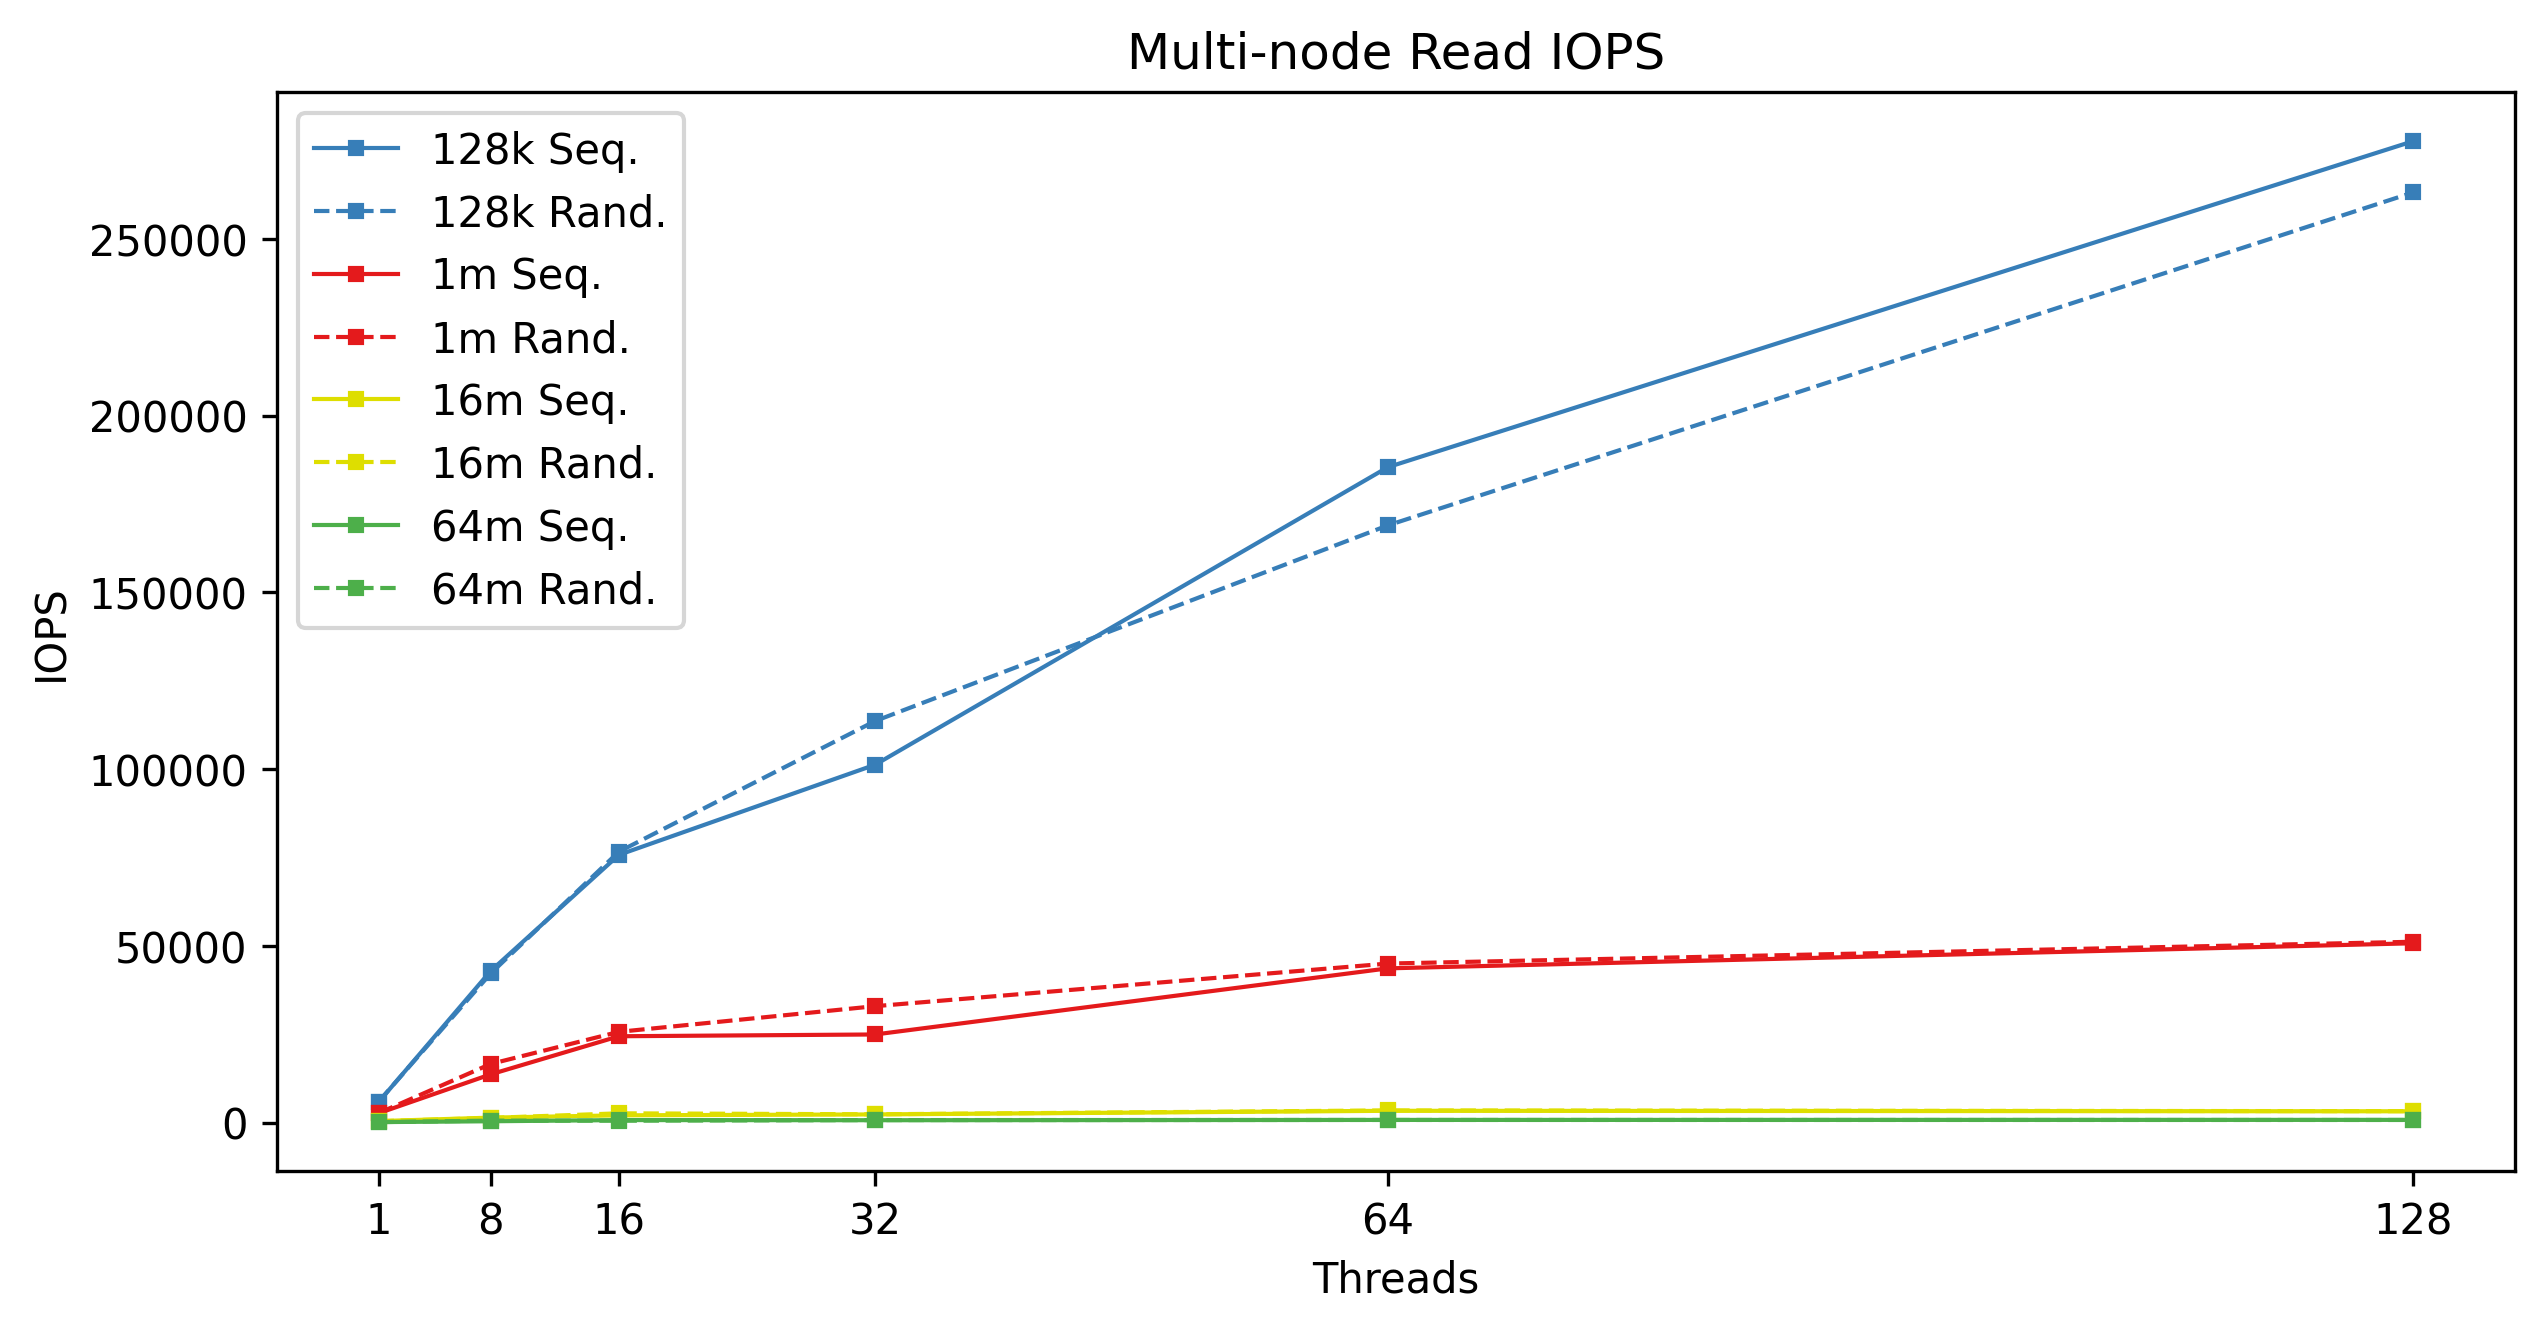

In [16]:
number_rows = 1
number_cols = 1

fig, ax = plt.subplots(nrows=number_rows, ncols=number_cols, figsize=(9,5), dpi=300)
fig.tight_layout(pad=4)

# Plot 128k transfer size, seq writes
ax.plot(
    seq_reads_df_flash.loc[seq_reads_df_flash["transfer_size"] == "128k"]["threads"],
    seq_reads_df_flash.loc[seq_reads_df_flash["transfer_size"] == "128k"]["IOPS"],
    lw=1, label="128k Seq.",
    marker="s", markersize=3,
    color=CB_color_cycle["blue"]
)

#Plot 128k transfer size, rand writes
ax.plot(
    rand_reads_df_flash.loc[rand_reads_df_flash["transfer_size"] == "128k"]["threads"],
    rand_reads_df_flash.loc[rand_reads_df_flash["transfer_size"] == "128k"]["IOPS"],
    lw=1, label="128k Rand.",
    marker="s", markersize=3, linestyle="dashed",
    color=CB_color_cycle["blue"]
)

# Plot 1m transfer size, seq writes
ax.plot(
    seq_reads_df_flash.loc[seq_reads_df_flash["transfer_size"] == "1m"]["threads"],
    seq_reads_df_flash.loc[seq_reads_df_flash["transfer_size"] == "1m"]["IOPS"],
    lw=1, label="1m Seq.",
    marker="s", markersize=3,
    color=CB_color_cycle["red"]
)

#Plot 1m transfer size, rand writes
ax.plot(
    rand_reads_df_flash.loc[rand_reads_df_flash["transfer_size"] == "1m"]["threads"],
    rand_reads_df_flash.loc[rand_reads_df_flash["transfer_size"] == "1m"]["IOPS"],
    lw=1, label="1m Rand.",
    marker="s", markersize=3, linestyle="dashed",
    color=CB_color_cycle["red"]
)

# Plot 16m transfer size, seq writes
ax.plot(
    seq_reads_df_flash.loc[seq_reads_df_flash["transfer_size"] == "16m"]["threads"],
    seq_reads_df_flash.loc[seq_reads_df_flash["transfer_size"] == "16m"]["IOPS"],
    lw=1, label="16m Seq.",
    marker="s", markersize=3,
    color=CB_color_cycle["yellow"]
)

#Plot 16m transfer size, rand writes
ax.plot(
    rand_reads_df_flash.loc[rand_reads_df_flash["transfer_size"] == "16m"]["threads"],
    rand_reads_df_flash.loc[rand_reads_df_flash["transfer_size"] == "16m"]["IOPS"],
    lw=1, label="16m Rand.",
    marker="s", markersize=3, linestyle="dashed",
    color=CB_color_cycle["yellow"]
)

# Plot 64m transfer size, seq writes
ax.plot(
    seq_reads_df_flash.loc[seq_reads_df_flash["transfer_size"] == "64m"]["threads"],
    seq_reads_df_flash.loc[seq_reads_df_flash["transfer_size"] == "64m"]["IOPS"],
    lw=1, label="64m Seq.",
    marker="s", markersize=3,
    color=CB_color_cycle["green"]
)

#Plot 64m transfer size, rand writes
ax.plot(
    rand_reads_df_flash.loc[rand_reads_df_flash["transfer_size"] == "64m"]["threads"],
    rand_reads_df_flash.loc[rand_reads_df_flash["transfer_size"] == "64m"]["IOPS"],
    lw=1, label="64m Rand.",
    marker="s", markersize=3, linestyle="dashed",
    color=CB_color_cycle["green"]
)

ax.set_title("Single-node Read IOPS")
ax.set_ylabel("IOPS")
ax.set_xlabel("Threads")
ax.set_xticks([1, 8, 16, 32, 64, 128])
ax.legend()

#plt.show()
plt.savefig("grenoble_ior_read_iops.png", dpi=300)
#seq_writes_df


## Single-Node Write IOPS

### Parameters

* _Concurrent Tasks_: **1, 16, 32, 64, 128**
* _Nodes_: **1**
* _Transfer Sizes_: **128 KiB, 1 MiB, 16 MiB, 64 MiB**
* _Block Size_: **16 GiB**
* _Aggregate Filesize_: **2 TiB**
* _Access_: **File-per-process**

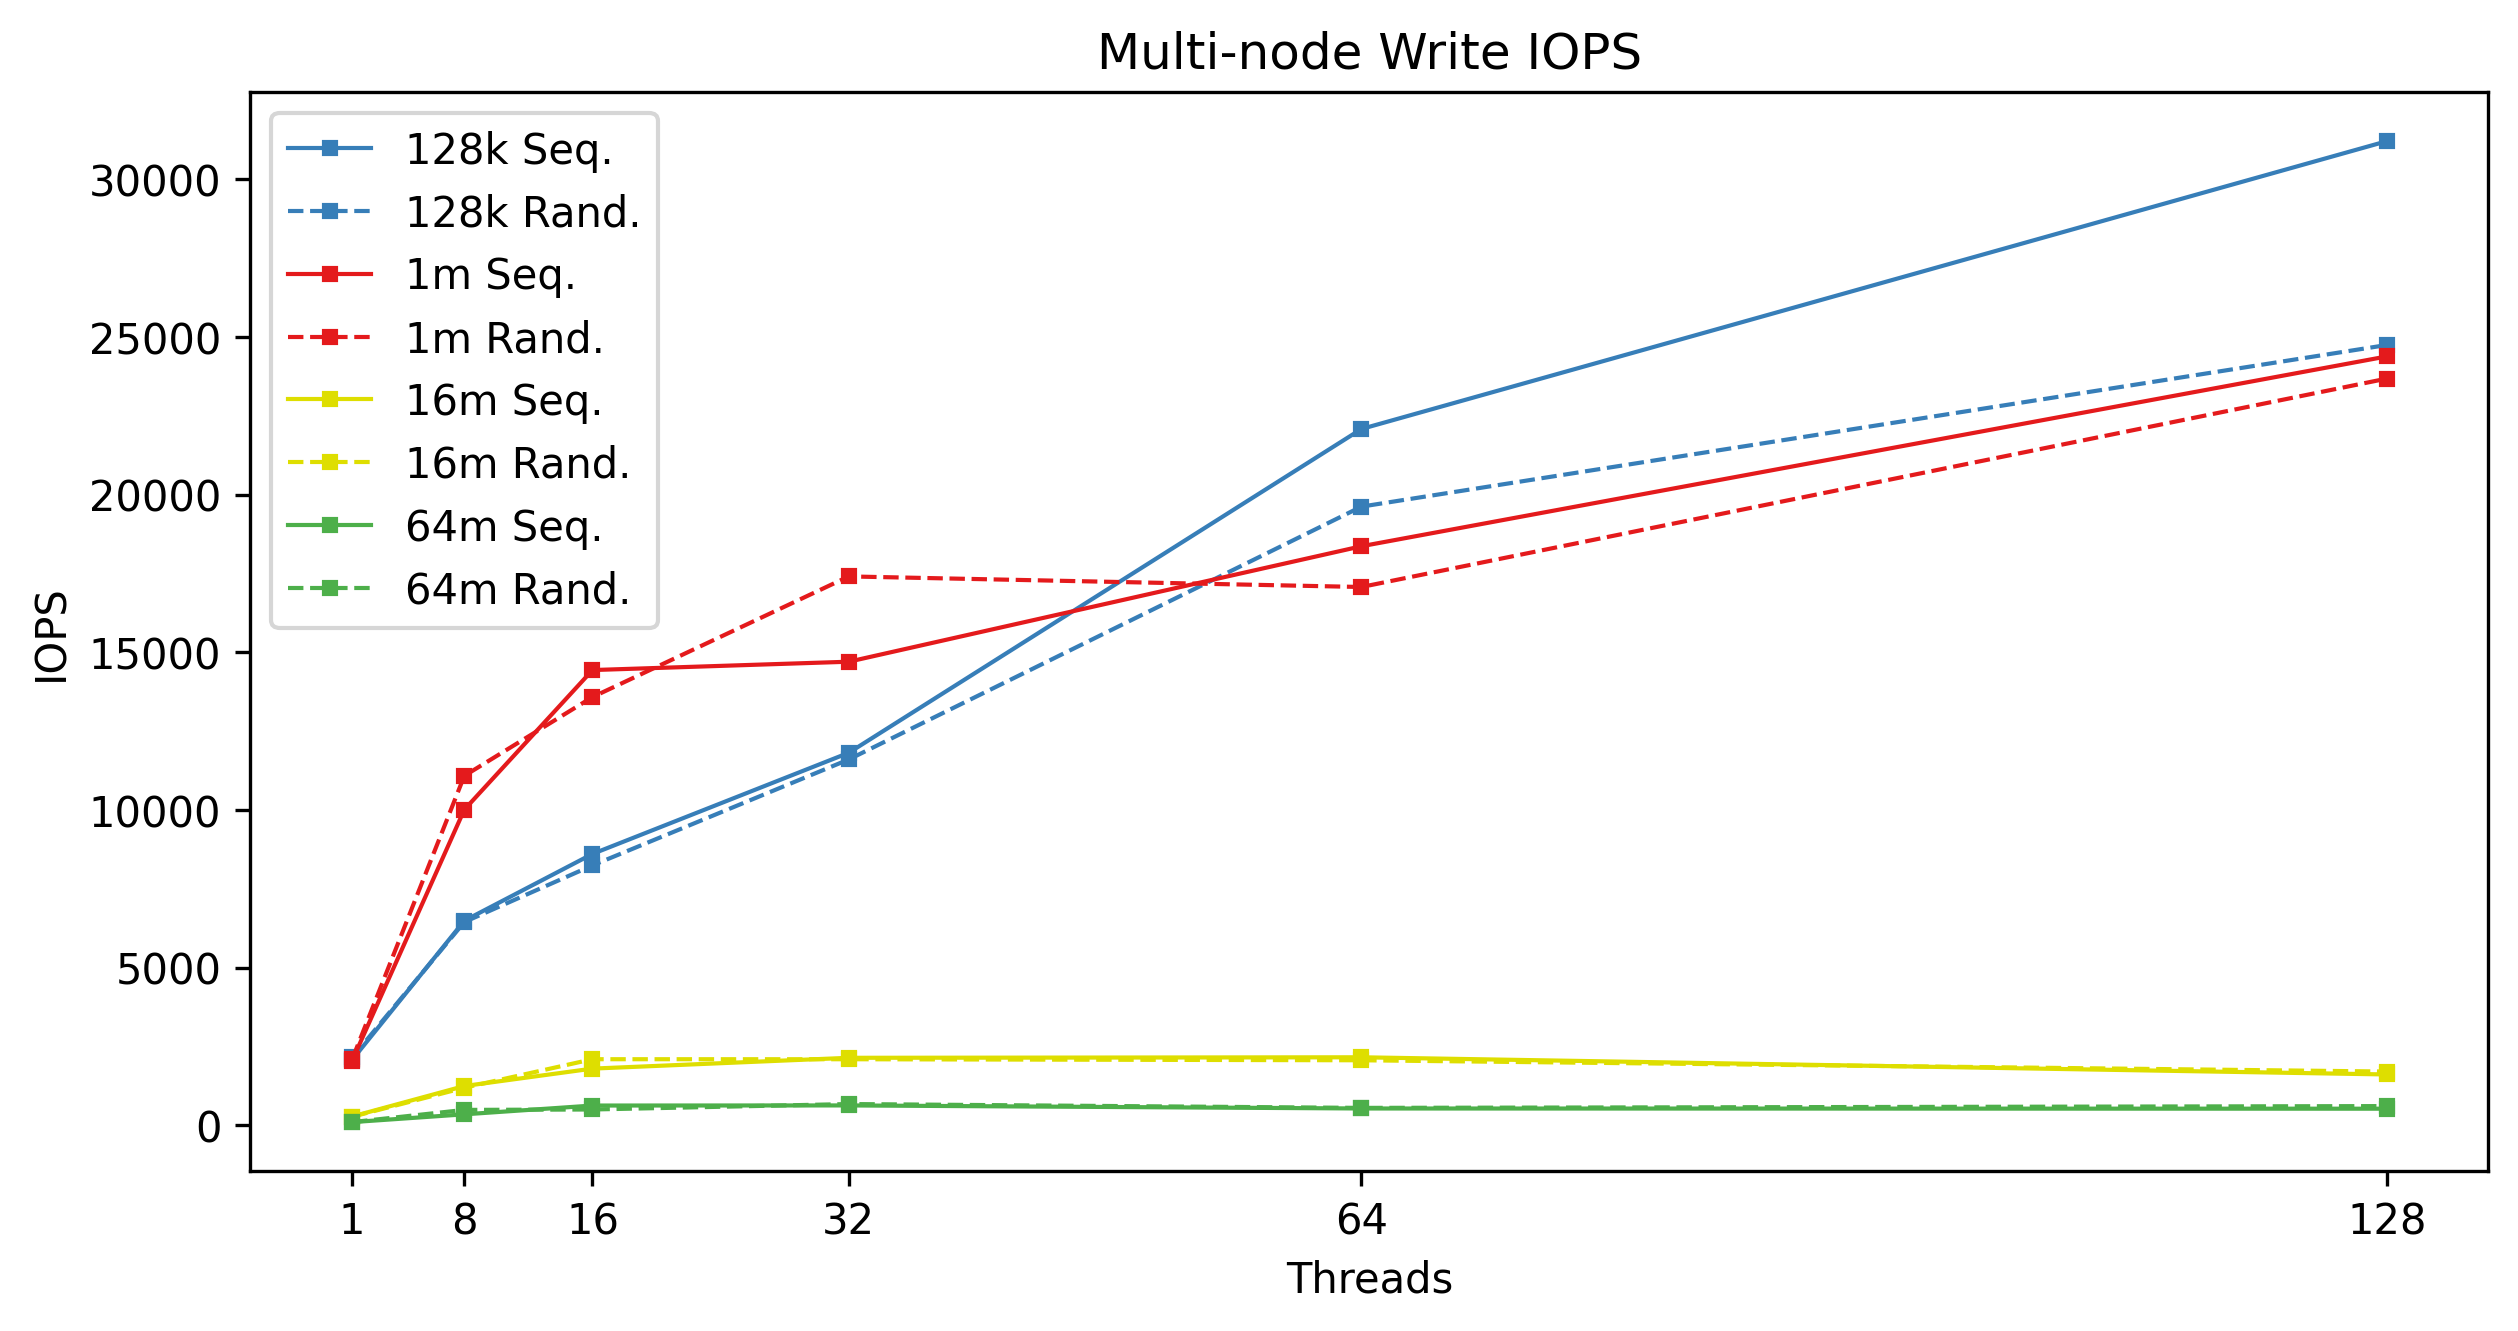

In [17]:
number_rows = 1
number_cols = 1

fig, ax = plt.subplots(nrows=number_rows, ncols=number_cols, figsize=(9,5), dpi=300)
fig.tight_layout(pad=4)

# Plot 128k transfer size, seq writes
ax.plot(
    seq_writes_df_flash.loc[seq_writes_df_flash["transfer_size"] == "128k"]["threads"],
    seq_writes_df_flash.loc[seq_writes_df_flash["transfer_size"] == "128k"]["IOPS"],
    lw=1, label="128k Seq.",
    marker="s", markersize=3,
    color=CB_color_cycle["blue"]
)

#Plot 128k transfer size, rand writes
ax.plot(
    rand_writes_df_flash.loc[rand_writes_df_flash["transfer_size"] == "128k"]["threads"],
    rand_writes_df_flash.loc[rand_writes_df_flash["transfer_size"] == "128k"]["IOPS"],
    lw=1, label="128k Rand.",
    marker="s", markersize=3, linestyle="dashed",
    color=CB_color_cycle["blue"]
)

# Plot 1m transfer size, seq writes
ax.plot(
    seq_writes_df_flash.loc[seq_writes_df_flash["transfer_size"] == "1m"]["threads"],
    seq_writes_df_flash.loc[seq_writes_df_flash["transfer_size"] == "1m"]["IOPS"],
    lw=1, label="1m Seq.",
    marker="s", markersize=3,
    color=CB_color_cycle["red"]
)

#Plot 1m transfer size, rand writes
ax.plot(
    rand_writes_df_flash.loc[rand_writes_df_flash["transfer_size"] == "1m"]["threads"],
    rand_writes_df_flash.loc[rand_writes_df_flash["transfer_size"] == "1m"]["IOPS"],
    lw=1, label="1m Rand.",
    marker="s", markersize=3, linestyle="dashed",
    color=CB_color_cycle["red"]
)

# Plot 16m transfer size, seq writes
ax.plot(
    seq_writes_df_flash.loc[seq_writes_df_flash["transfer_size"] == "16m"]["threads"],
    seq_writes_df_flash.loc[seq_writes_df_flash["transfer_size"] == "16m"]["IOPS"],
    lw=1, label="16m Seq.",
    marker="s", markersize=3,
    color=CB_color_cycle["yellow"]
)

#Plot 16m transfer size, rand writes
ax.plot(
    rand_writes_df_flash.loc[rand_writes_df_flash["transfer_size"] == "16m"]["threads"],
    rand_writes_df_flash.loc[rand_writes_df_flash["transfer_size"] == "16m"]["IOPS"],
    lw=1, label="16m Rand.",
    marker="s", markersize=3, linestyle="dashed",
    color=CB_color_cycle["yellow"]
)

# Plot 64m transfer size, seq writes
ax.plot(
    seq_writes_df_flash.loc[seq_writes_df_flash["transfer_size"] == "64m"]["threads"],
    seq_writes_df_flash.loc[seq_writes_df_flash["transfer_size"] == "64m"]["IOPS"],
    lw=1, label="64m Seq.",
    marker="s", markersize=3,
    color=CB_color_cycle["green"]
)

#Plot 64m transfer size, rand writes
ax.plot(
    rand_writes_df_flash.loc[rand_writes_df_flash["transfer_size"] == "64m"]["threads"],
    rand_writes_df_flash.loc[rand_writes_df_flash["transfer_size"] == "64m"]["IOPS"],
    lw=1, label="64m Rand.",
    marker="s", markersize=3, linestyle="dashed",
    color=CB_color_cycle["green"]
)

ax.set_title("Single-node Write IOPS")
ax.set_ylabel("IOPS")
ax.set_xlabel("Threads")
ax.set_xticks([1, 8, 16, 32, 64, 128])
ax.legend()

#plt.show()
plt.savefig("grenoble_ior_write_iops.png", dpi=300)
#seq_writes_df
